# Zomato Bangalore Restaurant Dataset 

Research Question: Prediction of rating of the restaurant in the app on the basis of online order, Table booking, Votes, Restaurant type, Approx cost for two people and Location.

In [1]:
#Importing the essential libraries 
import pandas as pd
import numpy as np

#Importing the graph plotting libraries  
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Suhal'

In [3]:
#Loading the data into data frame

df = pd.read_csv("C:\\Users\\Suhal\\Desktop\\MS In DA\\Data Sets\\zomato-bangalore-restaurants\\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
len(df['location'].unique())

94

In [9]:
len(df['rest_type'].unique())

94

In [10]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [11]:
len(df['approx_cost(for two people)'].unique())

71

In [12]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [13]:
len(df['listed_in(type)'].unique())

7

In [14]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [15]:
len(df['listed_in(city)'].unique())

30

# Exploratory Data Analysis

Data Cleaning: Handle NA values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [17]:
#Droping the features that are not required to build our model

df1 = df.drop(['url','address','phone','location','dish_liked','cuisines','reviews_list','menu_item'],axis = 'columns')
df1.head()

,name,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari


In [18]:
#Checking the Null Values

df1.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
rest_type                       227
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [19]:
#Dropping the Null Values

df2 = df1.dropna() 
df2.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [20]:
#Assiging lables to the categorical variable to Online Order attribute 

def conv(conv):
    if conv == 'No':
        return 0
    else:
        return 1

df2['online_order'] = df2['online_order'].map(conv)

In [21]:
df2.head()

,name,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,1,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,1,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,0,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari


Text(0,0.5,'Frequency')

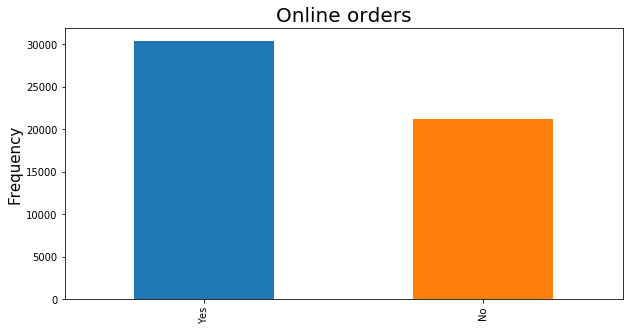

In [22]:
#Ploting the online orders attributes value count

plt.figure(figsize=(10,5))
df['online_order'].value_counts().plot.bar()
plt.title('Online orders', fontsize = 20)
plt.ylabel('Frequency',size = 15)

In [23]:
#Assiging lables to the categorical variables to Table Booking attribute

def conv(conv):
    if conv == 'No':
        return 0
    else:
        return 1

df2['book_table'] = df2['book_table'].map(conv)

In [24]:
df2.head()

,name,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1/5,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1/5,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,0,0,3.8/5,166,Casual Dining,600,Buffet,Banashankari


Text(0,0.5,'Frequency')

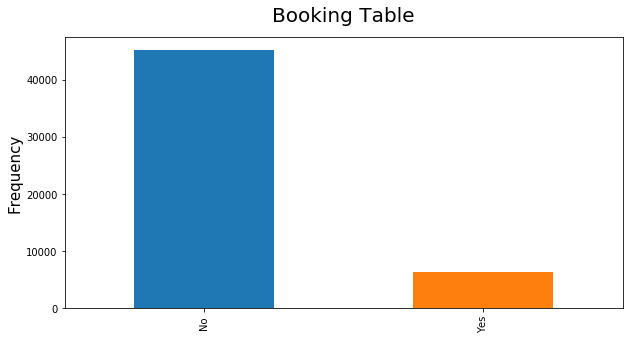

In [25]:
#Ploting the booking table attributes value count

plt.figure(figsize=(10,5))
df['book_table'].value_counts().plot.bar()
plt.title('Booking Table', fontsize = 20,pad=15)
plt.ylabel('Frequency', fontsize = 15)

In [26]:
df2['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
#Replacing the NaN values 

df2['rate'] = df2['rate'].replace('NEW',np.NaN)
df2['rate'] = df2['rate'].replace('-',np.NaN)

In [28]:
from scipy.stats import norm
from scipy import stats

In [29]:
#Converting rating values into the float values from string 

df2.rate=df2.rate.astype(str)
df2.rate=df2.rate.apply(lambda x : x.replace('/5','')).astype(float)
df2.head()

,name,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,300,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Casual Dining,600,Buffet,Banashankari


In [30]:
df2['rate'] = df2['rate'].fillna(df2['rate'].mean())

In [31]:
df2.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

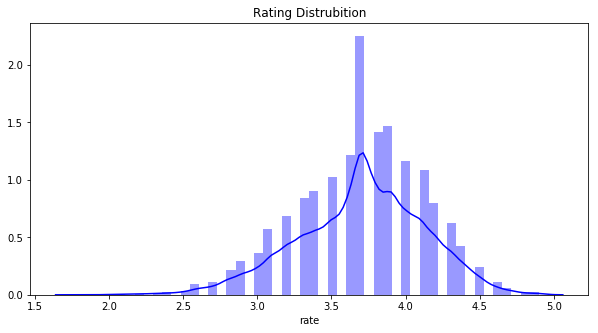

In [35]:
#histogram of Price

plt.figure(figsize=(10,5))
sns.distplot(df2['rate'],color='b');
plt.title("Rating Distrubition")
plt.show()

In [36]:
#Renaming the Columns Names

df2=df2.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'Location_in_City'})

In [37]:
df2.cost.dtype

dtype('O')

In [38]:
#Converting the cost value to float from string

df2.cost=df2.cost.astype(str)
df2.cost=df2.cost.apply(lambda y : y.replace(',','')).astype(float)
df2.head()

,name,online_order,book_table,rate,votes,rest_type,cost,type,Location_in_City
0,Jalsa,1,1,4.1,775,Casual Dining,800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Casual Dining,800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Casual Dining,600.0,Buffet,Banashankari


One hot Encoding

In [39]:
#Applying One hot encoding on the Rest Type attribute 

dummiesresttype = pd.get_dummies(df2.rest_type)
dummiesresttype.head(3)

,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Quick Bites",Bar,"Bar, Casual Dining","Bar, Lounge","Bar, Pub",...,"Quick Bites, Dessert Parlor","Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Applying One hot encoding on the Type attribute

dummiestype = pd.get_dummies(df2.type)
dummiestype.head(3)

,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [41]:
#Applying One hot encoding on the Location in city attribute

dummiescity = pd.get_dummies(df2.Location_in_City)
dummiescity.head(3)

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Concating them into one data frame

df3 = pd.concat([df2,dummiesresttype,dummiestype,dummiescity],axis="columns")
df3.head()

,name,online_order,book_table,rate,votes,rest_type,cost,type,Location_in_City,Bakery,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Casual Dining,800.0,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Casual Dining,800.0,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining",800.0,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,300.0,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Casual Dining,600.0,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dfname = df3["name"]

In [44]:
dfname.head()

0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object

In [45]:
dflocation = df3["Location_in_City"]

In [46]:
dflocation.head()

0    Banashankari
1    Banashankari
2    Banashankari
3    Banashankari
4    Banashankari
Name: Location_in_City, dtype: object

In [47]:
#Dropping the One unwanted columns

df4 = df3.drop(["name","rest_type","type","Location_in_City"],axis = "columns")
df4.head()

,online_order,book_table,rate,votes,cost,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df4.head()

,online_order,book_table,rate,votes,cost,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation Matrix and Distribution Plot of Dependent Variable

In [49]:
corr = df4.corr()
corr

,online_order,book_table,rate,votes,cost,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
online_order,1.000000,-0.050397,0.066651,-0.005651,-0.163457,-0.023318,-0.002099,0.011067,-0.016302,-0.002099,...,-0.067464,-0.048837,-0.000341,0.000177,-0.000991,-0.008126,-0.022999,-0.062846,0.013594,-0.010118
book_table,-0.050397,1.000000,0.420557,0.391949,0.613887,-0.056050,-0.002822,-0.010574,-0.022520,-0.002822,...,0.038205,0.044732,-0.008711,-0.017249,-0.020415,0.019053,-0.019264,0.038970,-0.011732,0.001945
rate,0.066651,0.420557,1.000000,0.433479,0.379793,-0.026837,-0.003971,0.029242,-0.001838,-0.009525,...,0.031398,0.042888,0.004840,-0.057930,-0.017392,0.008587,-0.014476,0.031813,-0.036333,-0.028028
votes,-0.005651,0.391949,0.433479,1.000000,0.367371,-0.044906,-0.002605,0.030150,-0.015074,-0.002441,...,0.012159,0.028647,-0.011359,-0.013446,-0.010681,0.025923,-0.018933,0.019142,-0.006852,-0.013090
cost,-0.163457,0.613887,0.379793,0.367371,1.000000,-0.066012,-0.006195,0.004459,-0.028781,-0.001399,...,0.092794,0.096226,0.004387,-0.024452,-0.024697,0.021546,-0.022220,0.085233,-0.007809,0.016710
Bakery,-0.023318,-0.056050,-0.026837,-0.044906,-0.066012,1.000000,-0.000912,-0.005479,-0.007281,-0.000912,...,-0.006276,0.002173,-0.003919,-0.000996,-0.002106,0.002267,-0.007260,-0.004492,0.011547,0.008019
"Bakery, Beverage Shop",-0.002099,-0.002822,-0.003971,-0.002605,-0.006195,-0.000912,1.000000,-0.000276,-0.000367,-0.000046,...,-0.001277,-0.001304,-0.001025,-0.001211,-0.000790,0.019324,-0.000982,-0.001225,-0.001068,-0.001166
"Bakery, Cafe",0.011067,-0.010574,0.029242,0.030150,0.004459,-0.005479,-0.000276,1.000000,-0.002201,-0.000276,...,0.010969,0.013489,-0.002334,-0.004011,0.000168,0.013564,-0.005896,0.012016,-0.006413,0.023439
"Bakery, Dessert Parlor",-0.016302,-0.022520,-0.001838,-0.015074,-0.028781,-0.007281,-0.000367,-0.002201,1.000000,-0.000367,...,-0.000830,-0.001229,0.009097,-0.004750,0.001098,0.001084,0.013175,-0.000047,0.010865,-0.004209
"Bakery, Food Court",-0.002099,-0.002822,-0.009525,-0.002441,-0.001399,-0.000912,-0.000046,-0.000276,-0.000367,1.000000,...,-0.001277,-0.001304,0.021890,-0.001211,-0.000790,-0.001154,-0.000982,-0.001225,-0.001068,-0.001166


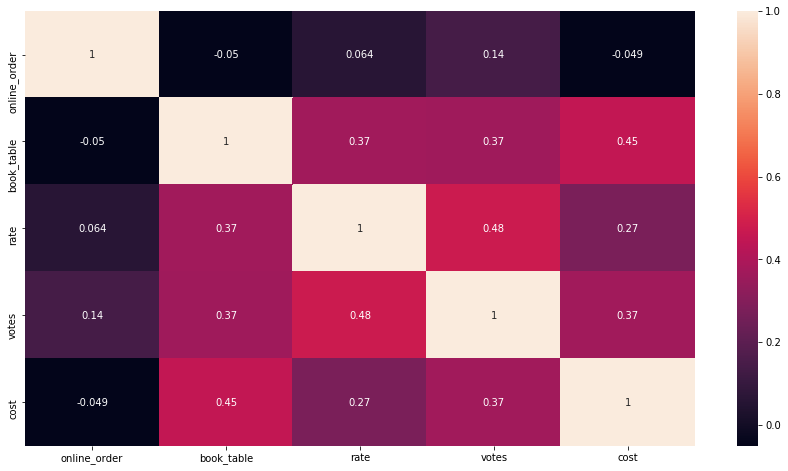

In [50]:
#Plotting correlation matrix without dummies 

corr = df2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Building Model and Evalution Matrix

In [51]:
X = df4.drop(['rate'],axis='columns')
X.head(10)

,online_order,book_table,votes,cost,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Quick Bites",...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,1,1,775,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,286,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,8,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,2556,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,324,700.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,504,550.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X.shape

(43541, 128)

In [53]:
y = df4.rate
y.head(10)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rate, dtype: float64

In [54]:
len(y)

43541

In [55]:
#Spliting data into test and train

from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

C:\Users\Suhal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNN Regressor Model and Evalution

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(X_train,y_train)

Y_knn_pred = knn.predict(X_test)

Y_knn_x_pred = knn.predict(X_train)

In [57]:
r2 = r2_score(y_test,Y_knn_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  66.77713834312519


In [58]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_knn_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_knn_pred)).astype(str))

RMSE value of Training dataset:0.18951393186143306
RMSE value of testing dataset:0.24762706918793445


In [59]:
acc = knn.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  80.39511208639095


In [60]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(knn, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())
cv_res

0.6314010665185037


array([0.63099375, 0.62008954, 0.63080465, 0.64371632])

Linear Regression Model and Evalution

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

Y_lr_pred = lr.predict(X_test)

Y_lr_x_pred = knn.predict(X_train)

In [62]:
r2 = r2_score(y_test,Y_lr_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  33.67530054553255


In [63]:
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,Y_lr_x_pred)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,Y_lr_pred)).astype(str))

RMSE value of Training dataset:0.18951393186143306
RMSE value of testing dataset:0.34987849038919117


In [64]:
acc = lr.score(X_train,y_train)
print('Accuracy: ',acc*100)

Accuracy:  34.91254587776572


In [65]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(lr, X_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())

0.34386609979060834


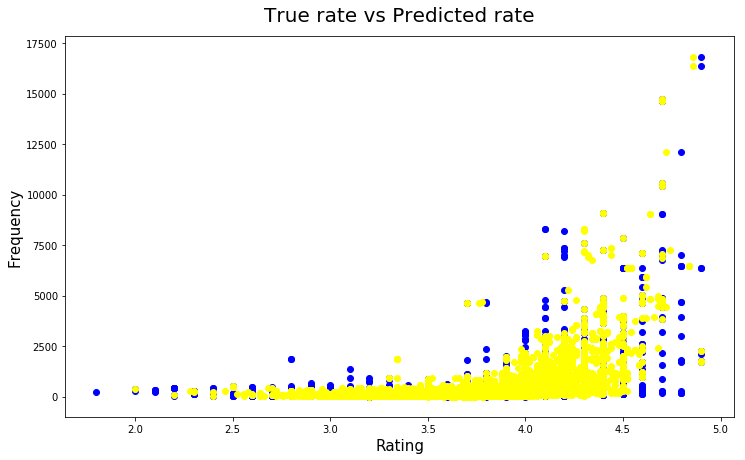

In [66]:
#plotting the KNN values predicated Rating

plt.figure(figsize=(12,7))
# preds_rf = knn.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(Y_knn_pred,X_test.iloc[:,2],color="yellow")

In [67]:
type(Y_knn_pred)

numpy.ndarray

In [68]:
dfrating = pd.Series(Y_knn_pred)

In [69]:
dfrating.head()

0    4.10
1    3.34
2    3.90
3    4.04
4    4.02
dtype: float64

In [70]:
dfreco = pd.concat([dfname,dfrating,dflocation],axis="columns")

In [71]:
dfreco.head()

,name,0,Location_in_City
0,Jalsa,4.10,Banashankari
1,Spice Elephant,3.34,Banashankari
2,San Churro Cafe,3.90,Banashankari
3,Addhuri Udupi Bhojana,4.04,Banashankari
4,Grand Village,4.02,Banashankari


In [72]:
dfreco = dfreco.rename(columns={0:'Predicated_Rating'})

In [73]:
dfreco.head()

,name,Predicated_Rating,Location_in_City
0,Jalsa,4.10,Banashankari
1,Spice Elephant,3.34,Banashankari
2,San Churro Cafe,3.90,Banashankari
3,Addhuri Udupi Bhojana,4.04,Banashankari
4,Grand Village,4.02,Banashankari


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
cf.go_offline()

In [75]:
rest = pd.pivot_table(data = dfreco, index = 'name', values = 'Predicated_Rating' , aggfunc = np.sum).reset_index()
rest = rest.sort_values(by = 'Predicated_Rating', ascending = False).reset_index(drop=True)
rest.head(5).iplot(kind = 'pie', labels= 'name', values= 'Predicated_Rating', title = 'Top Resturent with most Ratings' )

In [76]:

rat = dfreco[['Location_in_City','Predicated_Rating']]
rat = rat.groupby('Location_in_City').sum().sort_values('Predicated_Rating',ascending = False)
rat.head(10).iplot(kind = 'bar', title = ' Top 10 loaction with most number of Rating ')